<a href="https://colab.research.google.com/github/ZeroJoon2/DeepLearning/blob/main/6_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 불러오기

In [31]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

### 데이터 불러오기

In [4]:
(train_data, train_targets), (test_data, test_targets) = \
(boston_housing.load_data())

In [5]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [16]:
train_targets[:10], train_targets[-11:]

(array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4]),
 array([20. , 17.8,  7. , 11.8, 24.4, 13.8, 19.4, 25.2, 19.4, 19.4, 29.1]))

### 훈련 데이터 정규화

In [18]:
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

In [21]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation = 'relu')
        , layers.Dense(64, activation = 'relu')
        , layers.Dense(1)
    ])

    model.compile(optimizer = 'rmsprop'
                , loss = 'mse'
                , metrics = ['mae']
                  )

    return model

In [27]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f'{i}번째 폴드 처리 중')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples]
        , train_data[(i+1) * num_val_samples:]]
        , axis = 0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples]
         , train_targets[(i+1) * num_val_samples:]]
        , axis = 0)

    model = build_model()
    model.fit(partial_train_data
              , partial_train_targets
              , epochs = num_epochs
              , batch_size = 16
              , verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)

0번째 폴드 처리 중
1번째 폴드 처리 중
2번째 폴드 처리 중
3번째 폴드 처리 중


In [28]:
all_scores

[1.8898359537124634,
 2.7012522220611572,
 2.4590237140655518,
 2.5156960487365723]

In [30]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f'#{i}번쨰 폴드 처리 중')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples]
        , train_data[(i + 1) * num_val_samples:]]
        , axis = 0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples]
         , train_targets[(i + 1) * num_val_samples:]]
        , axis = 0)

    model = build_model()
    history = model.fit(partial_train_data
                        , partial_train_targets
                        , validation_data = (val_data, val_targets)
                        , epochs = num_epochs
                        , batch_size = 16
                        , verbose = 0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

#0번쨰 폴드 처리 중
#1번쨰 폴드 처리 중
#2번쨰 폴드 처리 중
#3번쨰 폴드 처리 중


In [36]:
average_mae_history = \
    [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

average_mae_history[:10]

[19.20098638534546,
 15.725611448287964,
 11.558104991912842,
 7.7590121030807495,
 5.859770178794861,
 4.826965093612671,
 4.1660637855529785,
 3.751361131668091,
 3.422373950481415,
 3.3172627091407776]

In [37]:
len(average_mae_history)

500

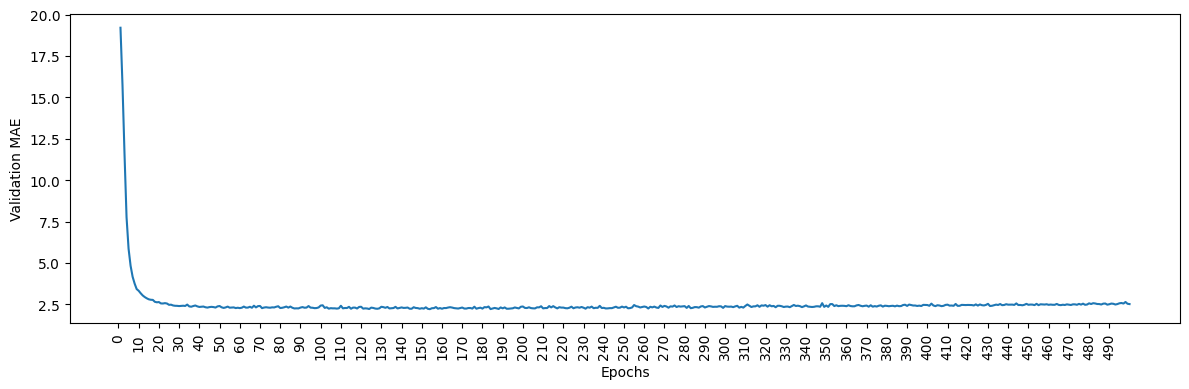

In [52]:
plt.figure(figsize = (12, 4))
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xticks(range(0, len(average_mae_history), 10), rotation = 90)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.tight_layout()
plt.show()

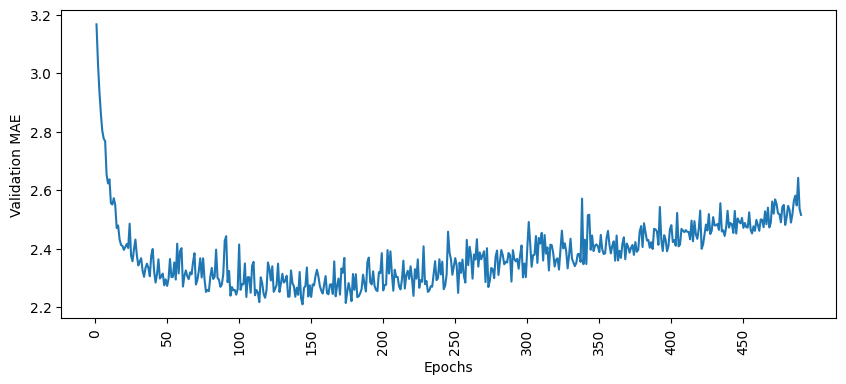

In [56]:
# 좀더 확대
plt.figure(figsize = (10, 4))
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xticks(range(0, len(truncated_mae_history), 50), rotation = 90)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [57]:
model = build_model()
model.fit(train_data
          , train_targets
          , epochs = 130
          , batch_size = 16
          , verbose = 0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mse_score, test_mae_score

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 12.7173 - mae: 2.4665


(16.313899993896484, 2.628753662109375)

In [58]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([8.513875], dtype=float32)

In [98]:
def build_model_modified_1():
    model = keras.Sequential([
        layers.Dense(32, activation = 'relu')
        , layers.Dense(32, activation = 'relu')
        , layers.Dense(1)
    ])

    model.compile(optimizer = 'rmsprop'
                , loss = 'mse'
                , metrics = ['mae']
                  )

    return model

k = 5
num_val_samples = len(train_data) // k
num_epochs = 125
num_batch_size = 16
all_scores = []
for i in range(k):
    print(f'{i+1}번째 폴드 처리 중')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples]
        , train_data[(i+1) * num_val_samples:]]
        , axis = 0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples]
         , train_targets[(i+1) * num_val_samples:]]
        , axis = 0)

    model = build_model_modified_1()
    model.fit(partial_train_data
                            , partial_train_targets
                            , epochs = num_epochs
                            , batch_size = num_batch_size
                            , verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)

print(f'''
all_scsores : {all_scores}
mean : {np.mean(all_scores)}
evaluate : {model.evaluate(test_data, test_targets)}
''')

model = build_model_modified_1()
model.fit(train_data
          , train_targets
          , epochs = num_epochs
          , batch_size = num_batch_size
          , verbose = 0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print(f'''
test_mae_score : {test_mae_score}
''')

1번째 폴드 처리 중
2번째 폴드 처리 중
3번째 폴드 처리 중
4번째 폴드 처리 중
5번째 폴드 처리 중
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 14.9852 - mae: 2.5699

all_scsores : [1.7601439952850342, 2.6429383754730225, 2.2877678871154785, 2.4554600715637207, 2.648630380630493]
mean : 2.35898814201355
evaluate : [22.15279769897461, 2.8159735202789307]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 13.4232 - mae: 2.4495

test_mae_score : 2.680363893508911

